In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
original = pd.read_csv('Salary Survey from AskAManager.org.csv', sep=',', decimal='.')

In [3]:
df = original.copy(deep=True)

In [4]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Tratamento Geral das Colunas

In [5]:
df.rename(columns = {'How old are you?':'age', 'What industry do you work in?':'work_industry','Job title':'job_title', "What is your annual salary? \
(You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent \
-- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"annual_salary", 'How much additional monetary \
compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation \
here, not the value of benefits.':'additional_monetary_compensation', 'Please indicate the currency':'currency', 'What country \
do you work in?':'country', "If you're in the U.S., what state do you work in?":"state_(US)", "What city do you work in?":"city" \
, "How many years of professional work experience do you have overall?":"overall_work_exp.", "How many years of \
professional work experience do you have in your field?":'fieldwork _exp.', "What is your highest level of \
education completed?":"level_of_education", "What is your gender?":"gender", "What is your race? (Choose all that apply.)":"race" \
, "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please \
only include monetary compensation here, not the value of benefits.":"additional_monetary_compensation", "If your income needs \
additional context, please provide it here:":"additional_income _context",'If "Other," please indicate the currency here: ':"other_currencies"},
         inplace=True)

In [6]:
df.head(2)

,Timestamp,age,work_industry,job_title,"If your job title needs additional context, please clarify here:",annual_salary,additional_monetary_compensation,currency,other_currencies,additional_income _context,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White


In [7]:
df.drop(['If your job title needs additional context, please clarify here:', 
          'additional_income _context', 
          'additional_monetary_compensation', 
          'other_currencies'], axis = 1, inplace=True)
          
#Essas colunas apresentam uma inconsistência muito grande na sua coleta de dados, obtendo entradas de texto de entrevistados 
#explicando o contexto e entrada de valores em si. Como são colunas de certa forma arbitrárias, resolvi desconsiderá-las.

In [8]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27779 entries, 0 to 27778
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 27779 non-null  object
 1   work_industry       27709 non-null  object
 2   job_title           27779 non-null  object
 3   annual_salary       27779 non-null  object
 4   currency            27779 non-null  object
 5   country             27779 non-null  object
 6   state_(US)          22840 non-null  object
 7   city                27704 non-null  object
 8   overall_work_exp.   27779 non-null  object
 9   fieldwork _exp.     27779 non-null  object
 10  level_of_education  27569 non-null  object
 11  gender              27614 non-null  object
 12  race                27615 non-null  object
dtypes: object(13)
memory usage: 2.8+ MB


### Ánalise Coluna "Currency"

In [10]:
df['currency'].value_counts(normalize=True)

USD        0.833723
CAD        0.059613
GBP        0.056662
EUR        0.022679
AUD/NZD    0.017927
Other      0.005256
CHF        0.001332
SEK        0.001332
JPY        0.000828
ZAR        0.000504
HKD        0.000144
Name: currency, dtype: float64

In [11]:
#Como a grande maioria dos salários são em dólar, limitei a análise a esses participantes. 
df = df.loc[(df['currency'] == 'USD'), :]

### Análise Coluna "Annual Salary"

In [12]:
df.head()

,age,work_industry,job_title,annual_salary,currency,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,"62,000",USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [13]:
df['annual_salary'] = df['annual_salary'].str.replace(',','')
df['annual_salary'] = df['annual_salary'].str.replace('.','')
df['annual_salary'] = df['annual_salary'].astype(float)

In [14]:
df['annual_salary'].isnull().sum()

0

In [15]:
df['annual_salary'].describe()

count    2.316000e+04
mean     9.649106e+04
std      6.735750e+05
min      0.000000e+00
25%      5.609050e+04
50%      7.850000e+04
75%      1.120000e+05
max      1.020000e+08
Name: annual_salary, dtype: float64

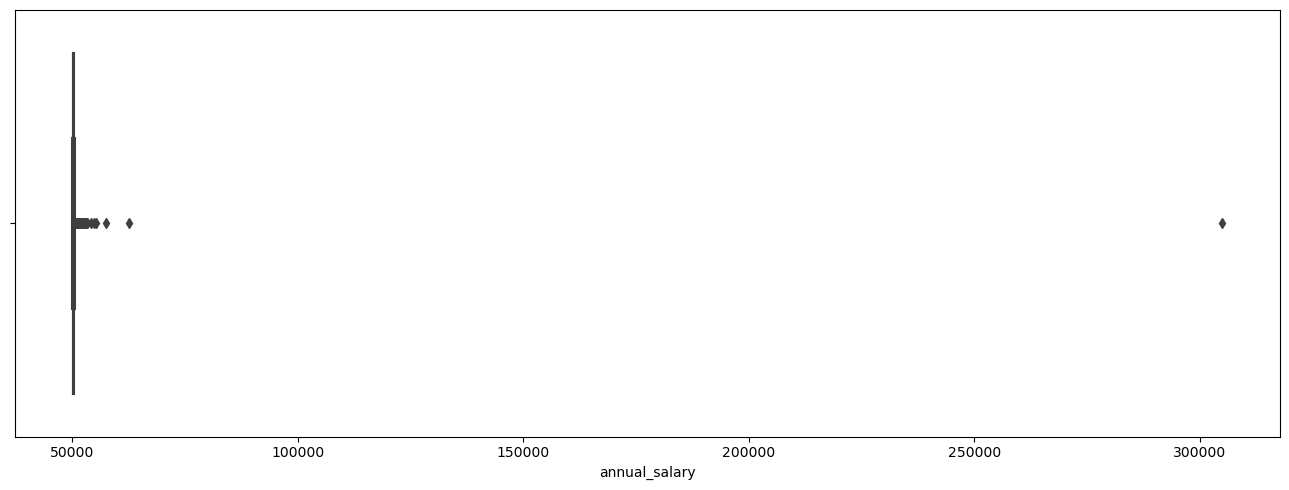

In [16]:
#Percebe-se que os dados têm outliers severos.
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(x=df['annual_salary'])
ax.set_xticklabels(np.arange(0,750000,50000))
plt.tight_layout()

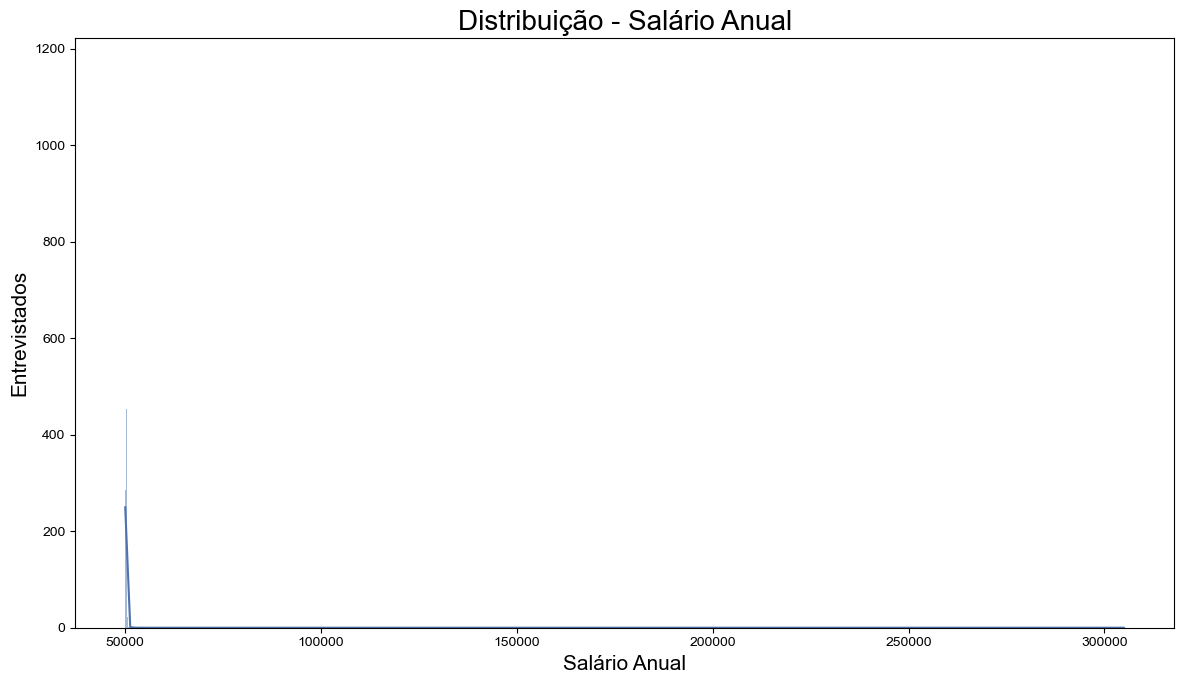

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_theme(style='white', font='verdana')
ax = sns.histplot(x=df['annual_salary'], kde=True)
ax.set_title('Distribuição - Salário Anual', fontsize=20)
ax.set_xlabel('Salário Anual', fontsize=15)
ax.set_ylabel('Entrevistados', fontsize=15)
ax.set_xticklabels(np.arange(0,500000,50000))

plt.tight_layout()

### Análise Coluna "Gender"

In [18]:
df['gender'].value_counts(dropna=False, normalize=True).mul(100)

Woman                            77.469775
Man                              18.380829
Non-binary                        2.564767
Other or prefer not to answer     0.988774
NaN                               0.591537
Prefer not to answer              0.004318
Name: gender, dtype: float64

In [19]:
df['gender'].replace({'Prefer not to answer': 'Other or prefer not to answer'}, inplace= True) 

In [20]:
df['gender'].value_counts(dropna=False, normalize=True).mul(100)

Woman                            77.469775
Man                              18.380829
Non-binary                        2.564767
Other or prefer not to answer     0.993092
NaN                               0.591537
Name: gender, dtype: float64

<AxesSubplot:xlabel='count', ylabel='gender'>

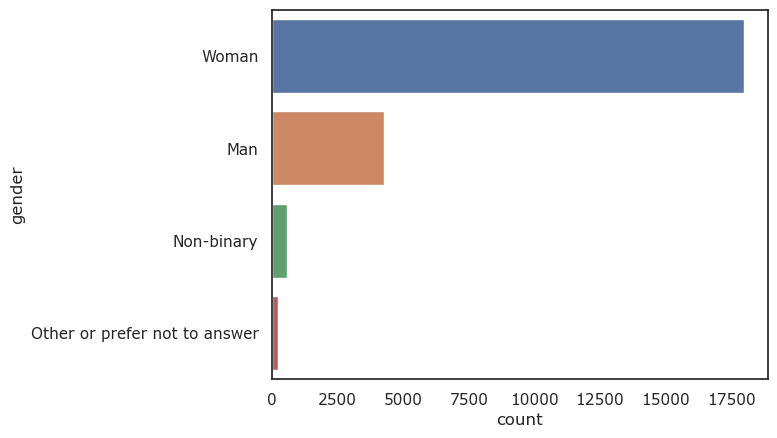

In [21]:
sns.countplot(y= df['gender'])

### Análise Coluna "Race"

In [22]:
df['race'].value_counts()

White                                                                                                                            19142
Asian or Asian American                                                                                                           1113
Black or African American                                                                                                          595
Hispanic, Latino, or Spanish origin                                                                                                534
Another option not listed here or prefer not to answer                                                                             461
Hispanic, Latino, or Spanish origin, White                                                                                         359
Asian or Asian American, White                                                                                                     300
Black or African American, White                       

In [23]:
df['race'] = df['race'].str.replace('Hispanic, Latino, or Spanish origin, White', 'Hispanic, Latino, or Spanish origin')
df['race'] = df['race'].str.replace('Asian or Asian American, White', 'Asian or Asian American') 
df['race'] = df['race'].str.replace('Black or African American, White', 'Black or African American') 
df['race'] = df['race'].str.replace('Middle Eastern or Northern African, White', 'Middle Eastern or Northern African')
df['race'] = df['race'].str.replace('Native American or Alaska Native, White', 'Native American or Alaska Native')
df['race'] = df['race'].str.replace('White, Another option not listed here or prefer not to answer', 'White')
df['race'] = df['race'].str.replace('Black or African American, Hispanic, Latino, or Spanish origin', 'Black or African American')
df['race'] = df['race'].str.replace('Asian or Asian American, Hispanic, Latino, or Spanish origin', 'Asian or Asian American')
df['race'] = df['race'].str.replace('Asian or Asian American, Hispanic, Latino, or Spanish origin, White', 'White')
df['race'] = df['race'].str.replace('Black or African American, Hispanic, Latino, or Spanish origin, White', 'White')
df['race'] = df['race'].str.replace('Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', 'White')
df['race'] = df['race'].str.replace('Hispanic, Latino, or Spanish origin, Native American or Alaska Native', 'Hispanic, Latino, or Spanish origin')
df['race'] = df['race'].str.replace('Asian or Asian American, Black or African American', 'Black or African American')
df['race'] = df['race'].str.replace('Asian or Asian American, Middle Eastern or Northern African', 'Middle Eastern or Northern African')
df['race'] = df['race'].str.replace('Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', 'Hispanic, Latino, or Spanish origin')

df['race'].value_counts()

White                                                                                              19178
Asian or Asian American                                                                             1439
Hispanic, Latino, or Spanish origin                                                                  919
Black or African American                                                                            758
Another option not listed here or prefer not to answer                                               461
Middle Eastern or Northern African                                                                   136
Native American or Alaska Native                                                                      88
Asian or Asian American, Another option not listed here or prefer not to answer                       13
Black or African American, Native American or Alaska Native                                            7
Asian or Asian American, Native American or Alaska Nati

In [24]:
#Com o objetivo de eliminar a redundância, ambiguidade e a cardinalidade, removeremos algumas categorias acima. Essas possuem pequeno volume,
#não gerando um impacto significativo.

df = df.loc[df['race'].isin(['White', 'Asian or Asian American', 'Hispanic, Latino, or Spanish origin', 'Black or African American', 
            'Another option not listed here or prefer not to answer', 'Middle Eastern or Northern African', 'Native American or Alaska Native']), :]

<AxesSubplot:xlabel='count', ylabel='race'>

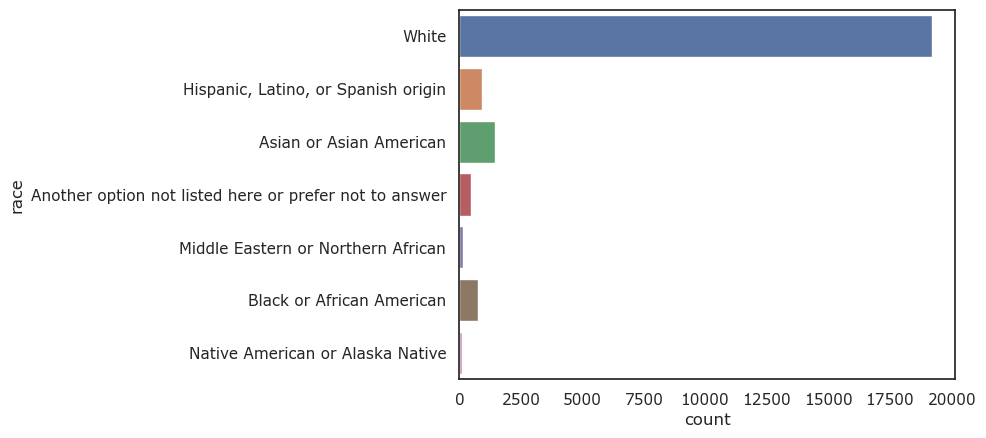

In [25]:
sns.countplot(y= df['race'])

### Análise Coluna "Level of Education"

In [26]:
df['level_of_education'].value_counts(dropna=False, normalize=True).mul(100)

College degree                        48.609600
Master's degree                       32.342574
Some college                           6.997694
Professional degree (MD, JD, etc.)     4.913182
PhD                                    4.874015
High School                            1.753775
NaN                                    0.509161
Name: level_of_education, dtype: float64

In [27]:
df['level_of_education'] = df['level_of_education'].str.replace('Some college', 'College degree')
df['level_of_education'].value_counts()

College degree                        12778
Master's degree                        7432
Professional degree (MD, JD, etc.)     1129
PhD                                    1120
High School                             403
Name: level_of_education, dtype: int64

In [28]:
df['level_of_education'] = pd.Categorical(df['level_of_education'], categories= ['High School',
                            'Professional degree (MD, JD, etc.)', 'College degree', "Master's degree", 'PhD'])

In [29]:
df['level_of_education'].value_counts(dropna=False, normalize=True).mul(100)

College degree                        55.607294
Master's degree                       32.342574
Professional degree (MD, JD, etc.)     4.913182
PhD                                    4.874015
High School                            1.753775
NaN                                    0.509161
Name: level_of_education, dtype: float64

### Análise Coluna "Fieldwork Exp." 

In [30]:
df['fieldwork _exp.'].value_counts(dropna=False, normalize=True).mul(100)

11 - 20 years       23.760825
5-7 years           23.438792
2 - 4 years         21.419557
8 - 10 years        18.120893
21 - 30 years        6.810566
1 year or less       4.874015
31 - 40 years        1.431742
41 years or more     0.143609
Name: fieldwork _exp., dtype: float64

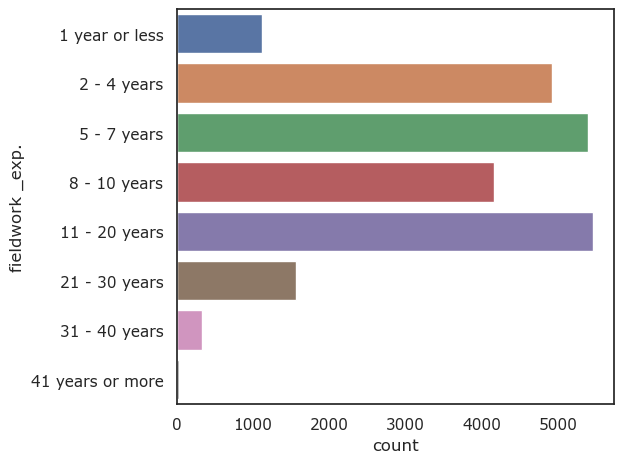

In [31]:
df['fieldwork _exp.'] = df['fieldwork _exp.'].str.replace('5-7 years', '5 - 7 years')
df['fieldwork _exp.'] = pd.Categorical(df['fieldwork _exp.'], categories = ['1 year or less','2 - 4 years','5 - 7 years', 
                                        '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'])

sns.countplot(y= df['fieldwork _exp.'])
plt.tight_layout()

### Análise Coluna "Overall Work Exp." 

In [32]:
df['overall_work_exp.'].value_counts(dropna=False, normalize=True).mul(100)

11 - 20 years       35.005875
8 - 10 years        19.069585
5-7 years           17.119979
21 - 30 years       13.177249
2 - 4 years         10.300709
31 - 40 years        3.168110
1 year or less       1.684146
41 years or more     0.474346
Name: overall_work_exp., dtype: float64

In [33]:
df['overall_work_exp.'].replace('5-7 years', '5 - 7 years', inplace=True)
df['overall_work_exp.'] = pd.Categorical(df['overall_work_exp.'], categories=['1 year or less','2 - 4 years','5 - 7 years', 
                                        '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'])

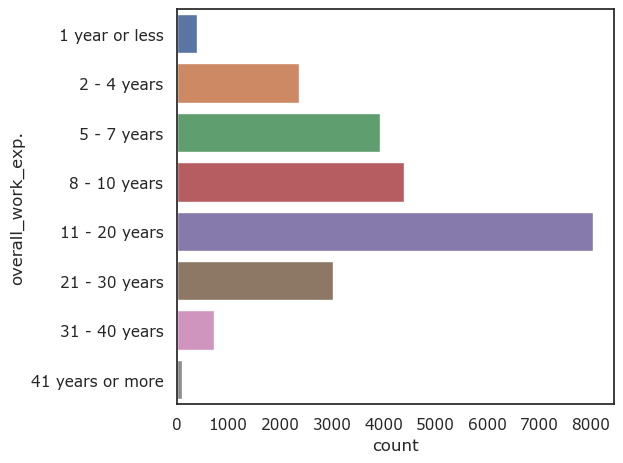

In [34]:
sns.countplot(y= df['overall_work_exp.'])
plt.tight_layout()

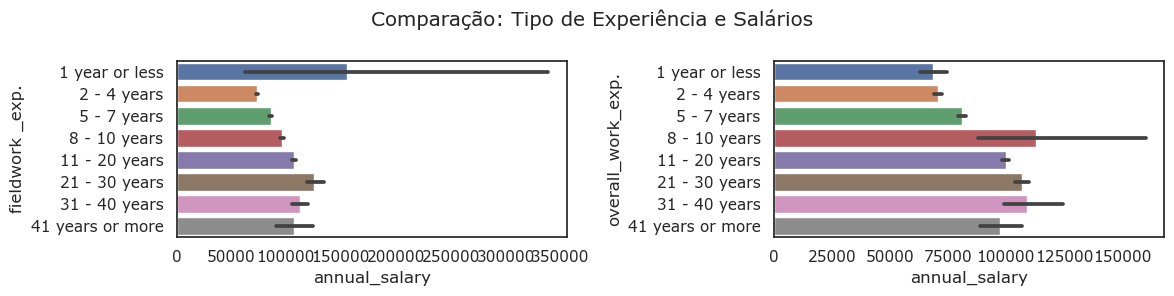

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (12,3))
fig.suptitle('Comparação: Tipo de Experiência e Salários')

sns.barplot(y= df['fieldwork _exp.'], x= df['annual_salary'], ax= ax[0])
sns.barplot(y= df['overall_work_exp.'], x= df['annual_salary'], ax= ax[1])


plt.tight_layout()

### Análise da Coluna "Age"

In [36]:
df['age'] = pd.Categorical(df['age'], categories= ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over'])

In [37]:
df['age'].value_counts(dropna=False, normalize = True).mul(100)

25-34         44.314374
35-44         35.806606
45-54         11.649767
18-24          4.055877
55-64          3.759955
65 or over     0.369903
under 18       0.043518
Name: age, dtype: float64

<AxesSubplot:xlabel='count', ylabel='age'>

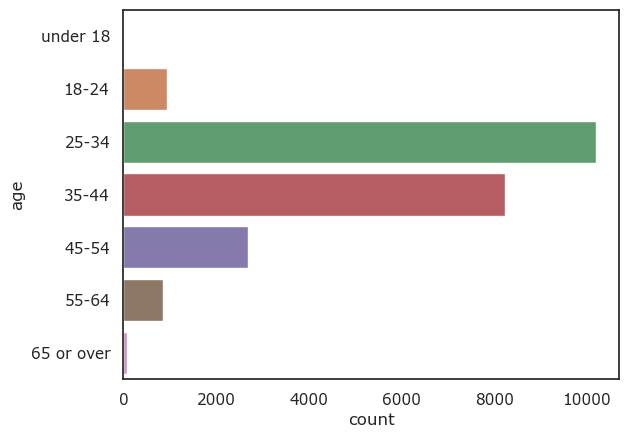

In [38]:
sns.countplot(y= df['age'])

### Ánalise da Coluna "Country"

In [39]:
df['country'].value_counts(dropna=False, normalize=True)

United States                                0.385004
USA                                          0.340006
US                                           0.111188
United States                                0.028591
U.S.                                         0.024675
                                               ...   
Cuba                                         0.000044
Cote d'Ivoire                                0.000044
From Romania, but for an US based company    0.000044
Somalia                                      0.000044
U.S.A                                        0.000044
Name: country, Length: 219, dtype: float64

In [40]:
df['country'].unique()

array(['United States', 'US', 'USA', 'usa', 'U.S.', 'United States ',
       'us', 'Usa', 'United States of America', 'United states', 'USA ',
       'United states ', 'united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'United Kingdom', 'Denmark', 'U.S.A.', 'America',
       'united states of america', 'Canada', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Mexico ',
       'France', 'United Stated', 'u.s.', 'UNITED STATES',
       'united States', 'Kuwait', 'Sri lanka', 'Contracts',
       'USA-- Virgin Islands', 'United Statws', 'U.S',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located",
       'Unites States ', 'Usa ', 'U.S.A. ', 'Japan', 'U. S. ', 'Germany',
       'United Sates', 'Japan ', 'United States of American ',
       

In [41]:
pd.set_option('display.max_rows', None)
dfCountry = df.loc[df['country'].str.contains(r'(Us|US|stat|Stat|us|SA|Un|un|meri)+' , regex=True), :]
dfCountry['country'].value_counts()

#Alguns países e outras espécies de preenchimento foram "pegos" pela experssão regular.

United States                                                                                                                                                                                                        8847
USA                                                                                                                                                                                                                  7813
US                                                                                                                                                                                                                   2555
United States                                                                                                                                                                                                         657
USA                                                                                                                             

In [42]:
dfCountry.shape

(22124, 13)

In [43]:
#Vamos manter as strings de países diferentes e alterar as strings relacionaadas com USA que estão completamente despadronizadas
#alteração essa para 'USA'. Pessoas que trabalham fora e para os EUA foram consideradas dos Estados Unidos. 

dfCountry2 = dfCountry['country'].where(dfCountry['country'].isin(['Russia', 'Australia', 'Australian', 'United Arab Emirates', 
                                                    'United Kingdom']), 'USA')
dfCountry2.value_counts()

#Percebe-se que algumas strings da lista passada não foram consideradas para alteração.

USA               22110
Australia             8
United Kingdom        6
Name: country, dtype: int64

In [44]:
dfCountry['country'].shape

(22124,)

In [45]:
df.loc[df['country'] == 'Russia ', :]

,age,work_industry,job_title,annual_salary,currency,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race
7696,25-34,Academia,Assistant,15000.0,USD,Russia,NaN,Moscow,8 - 10 years,5 - 7 years,PhD,Woman,White


In [46]:
df.loc[df['country'] == 'Australian ', :]

,age,work_industry,job_title,annual_salary,currency,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race
23224,35-44,Computing or Tech,Technical Lead,195000.0,USD,Australian,NaN,Sydney,11 - 20 years,11 - 20 years,College degree,Man,White


In [47]:
df.loc[df['country'] == 'United Arab Emirates ', :]

,age,work_industry,job_title,annual_salary,currency,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race
6756,45-54,Education (Higher Education),Librarian,69000.0,USD,United Arab Emirates,NaN,Dubai,21 - 30 years,11 - 20 years,Master's degree,Woman,White


In [48]:
# Como visto nas 3 células acima, percebe-se que o caractere em branco impediu que as strings fossem encontradas. 

dfCountry['country'] = dfCountry['country'].where(dfCountry['country'].isin(['Russia ', 'Australia', 'Australian ', 
                                                                         'United Arab Emirates ', 'United Kingdom']), 'USA')
dfCountry['country'].value_counts()

USA                      22107
Australia                    8
United Kingdom               6
United Arab Emirates         1
Russia                       1
Australian                   1
Name: country, dtype: int64

In [49]:
#Vamos corrigi-las (além da correção de 'Australian ' para 'Australia').

dfCountry['country'].replace({'Russia ':'Russia', 'Australian ':'Australia', 'United Arab Emirates ': 'United Arab Emirates'}, 
                   inplace=True)
dfCountry['country'].value_counts()

USA                     22107
Australia                   9
United Kingdom              6
United Arab Emirates        1
Russia                      1
Name: country, dtype: int64

In [50]:
dfCountry['country'].shape

(22124,)

In [51]:
df['country'].shape

(22979,)

In [52]:
#Percebe-se que a imensa maioria dos dados para a coluna Country são de residentes do USA. Devido a isso e a grande falta de 
#padrão no preenchimento dos dados, serão considerados para análise, apenas os residentes dos Estados Unidos. 
df = dfCountry.reset_index(drop=True)
df.drop(df[df['country'] != 'USA'].index, axis=0, inplace=True)
df['country'].shape

(22107,)

In [53]:
df['country'].value_counts()

USA    22107
Name: country, dtype: int64

### Análise da Coluna "State (US)"

In [54]:
#Percebe-se que há pessoas que trabalham em mais de uma cidade. Incluirei essas em um mesmo conjunto 
#chamado "More than one State". Washington DC foi considerado tanto como estado como cidade.
df['state_(US)'].value_counts(dropna=False, ascending=True)

Alabama, Montana                                                                                                         1
Arkansas, Iowa, Massachusetts, Ohio, Wyoming                                                                             1
Massachusetts, Vermont                                                                                                   1
District of Columbia, Maryland, Virginia                                                                                 1
Colorado, Massachusetts                                                                                                  1
Montana, Wyoming                                                                                                         1
New Jersey, Virginia                                                                                                     1
Nevada, Oregon                                                                                                           1
Massachusetts, P

In [55]:
df.loc[df['state_(US)'].str.contains(r'(,)+', regex=True, na=False), ['state_(US)']] = 'More than one State'

In [56]:
df['state_(US)'].value_counts(dropna=False)

California              2476
New York                2077
Massachusetts           1442
Texas                   1192
Illinois                1155
Washington              1144
District of Columbia     938
Pennsylvania             907
Virginia                 753
Minnesota                686
Ohio                     612
Colorado                 607
Oregon                   604
North Carolina           570
Maryland                 532
Michigan                 522
Georgia                  505
Florida                  502
Wisconsin                442
New Jersey               380
Missouri                 320
Indiana                  314
Arizona                  295
Tennessee                273
Connecticut              232
Utah                     195
Kentucky                 186
Iowa                     170
NaN                      156
Kansas                   146
South Carolina           141
Louisiana                124
Maine                    121
New Hampshire            115
Alabama       

In [57]:
#Os EUA possui 50 estados. As cateogiras dessa variável totalizaram 53 pois:
#1. District of Columbia (Washington DC) foi considerado como estado (apesar de não ser nem cidade, mas sim um distrito)
#2. Foi inserido o dado "More than one State"
#3. Tem o label NaN dos dados de valores missing. 
len(df['state_(US)'].value_counts(dropna=False)) 

53

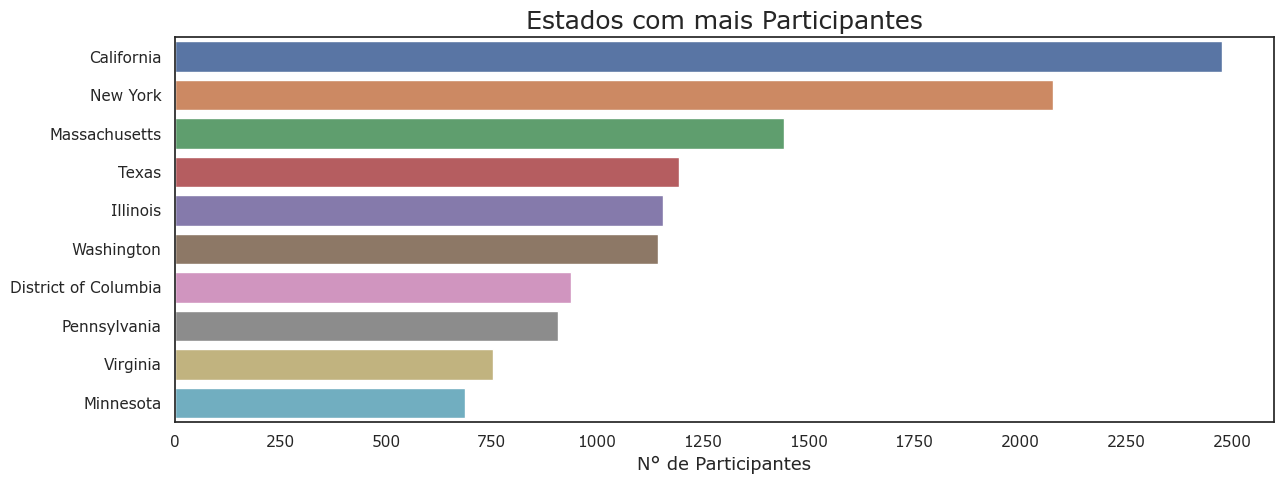

In [58]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style='darkgrid', font= 'verdana' )
states = df['state_(US)'].value_counts()[0:10]
ax = sns.barplot(x=states, y= states.index)
ax.set_title('Estados com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
ax.set_xticks(np.arange(0,2750,250))

plt.tight_layout()

### Análise da Coluna "City"

> Há muita cardinalidade nos dados e falta de padrão no preenchimento. Apenas selecionarei as 10 cidades onde as pessoas mais trabalham. Nessas cidades, será feito tratamento dos dados. Sempre que possível, será considerado a cidade onde o trabalhador reside caso esse trabalhe remoto.  Para os preenchimentos onde não se especifica a cidade em si, mas sim uma medida de proximidade de uma determinada cidade, será considerada a cidade usada como referência. Caso contenha duas cidades diferentes de estados diferentes sem especificar o local de moradia, será atribuido como "More than one City" (mais do que uma cidade). Caso se especifique o estado, será utilizado a capital do respectivo estado.

In [59]:
df['city'].isnull().sum()

55

In [60]:
#Cardinalidade muito grande (além da ausência de padrão de preenchimento).
len(df['city'].value_counts(dropna=False))

3682

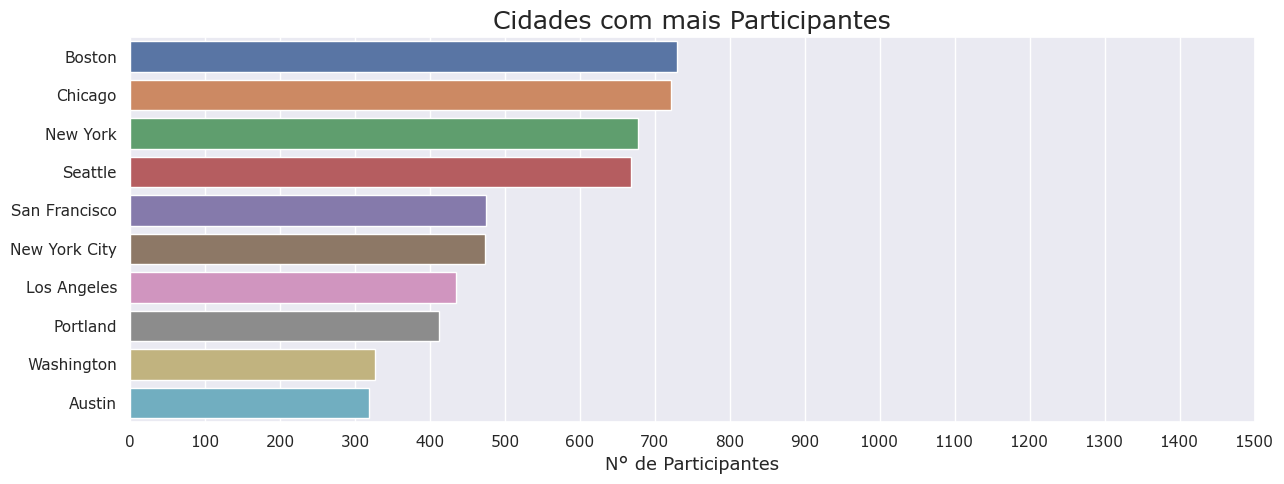

In [61]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style = 'darkgrid', font='verdana')
cities = df['city'].value_counts(dropna=False)[0:10]
ax = sns.barplot(y=cities.index, x=cities)
ax.set_title('Cidades com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
ax.set_xticks(np.arange(0,1600,100))

plt.tight_layout()

#### Boston   

In [62]:
df.loc[df['city'].str.contains('Boston', na=False), ['city']].value_counts()

city                                                                             
Boston                                                                               730
Boston                                                                                48
Boston, MA                                                                            12
Boston area                                                                            8
Boston Area                                                                            5
Boston suburbs                                                                         2
Metro Boston                                                                           2
North of Boston                                                                        2
Greater Boston Area                                                                    2
Greater Boston area                                                                    2
Remote. Live near Boston    

In [63]:
df['city'].loc[df['city'] == 'I left Boston for Indiana, so get a Boston salary in south bend '] = 'Indianápolis'
df['city'].loc[df['city'] == 'NYC, remotely for a Boston company'] = 'New York City'
df['city'].loc[df['city'] == 'Remote. Company is in Boston, I am in SF'] = 'San Francisco'
df['city'].loc[df['city'] == 'San Francisco, but company is Boston based'] = 'San Francisco'
df['city'].loc[df['city'] == 'Salem (remote for Boston Mass)'] = 'Salem'
df['city'].loc[df['city'] == 'NYC, remotely for a Boston company'] = 'New York City'
df['city'].loc[df['city'] == 'Raleigh; role based out of Boston MA'] = 'Raleigh'
df['city'].loc[df['city'] == 'Denver/Boston'] = 'More than one City'

In [64]:
df.loc[df['city'].str.contains('Boston', na=False), ['city']].value_counts()

city                                                                             
Boston                                                                               730
Boston                                                                                48
Boston, MA                                                                            12
Boston area                                                                            8
Boston Area                                                                            5
Boston suburbs                                                                         2
Greater Boston Area                                                                    2
Greater Boston area                                                                    2
Metro Boston                                                                           2
North of Boston                                                                        2
HQ us in Cambridge, Ma but m

In [65]:
df.loc[df['city'].str.contains('Boston', na=False), ['city']] = 'Boston' 

In [66]:
df.loc[df['city'].str.contains('Boston', na=False), ['city']].value_counts()

city  
Boston    848
dtype: int64

#### Chicago

In [67]:
df.loc[df['city'].str.contains('Chicago', na=False), ['city']].value_counts()

city                                                                                
Chicago                                                                                 722
Chicago                                                                                  67
Chicago suburbs                                                                          12
Chicago Suburbs                                                                           8
North Chicago                                                                             4
Chicagoland                                                                               4
Chicago area                                                                              4
Chicago, IL                                                                               4
Suburban Chicago                                                                          3
 Chicago                                                                               

In [68]:
df['city'].loc[df['city'] == 'Work remotely, but the company is based out of Chicago, IL and I work in Newark, NJ'] = 'Newark'
df['city'].loc[df['city'] == 'Office was in Chicago, now WFH in WI'] = 'Madison'
df['city'].loc[df['city'] == 'Chicago/Evanston'] = 'More than one City'
df['city'].loc[df['city'] == 'Chicago/Deerfield (two offices)'] = 'More than one City'
df['city'].loc[df['city'] == 'Denver, Chicago'] = 'More than one City'

In [69]:
df.loc[df['city'].str.contains('Chicago', na=False), ['city']].value_counts()

city                                                                                
Chicago                                                                                 722
Chicago                                                                                  67
Chicago suburbs                                                                          12
Chicago Suburbs                                                                           8
Chicago area                                                                              4
Chicagoland                                                                               4
Chicago, IL                                                                               4
North Chicago                                                                             4
Suburban Chicago                                                                          3
 Chicago                                                                               

In [70]:
df.loc[df['city'].str.contains('Chicago', na=False), ['city']] = 'Chicago'

In [71]:
df.loc[df['city'].str.contains('Chicago', na=False), ['city']].value_counts()

city   
Chicago    864
dtype: int64

#### New York City

In [72]:
df.loc[df['city'].str.contains('New York', na=False), ['city']].value_counts()

city                           
New York                           678
New York City                      475
New York                            75
New York City                       20
New York, NY                         6
New York city                        6
Austin / New York                    1
New York Metro                       1
New YorknCity                        1
New York, New York                   1
New York, NY                         1
New York city                        1
New York City Suburbs                1
New York City, currently remote      1
New York City, New York              1
Greater New York Metro Area          1
New York City (remote)               1
New York City (The Bronx)            1
New York CIty                        1
New York Buty                        1
Upstate New York                     1
dtype: int64

In [73]:
df.loc[df['city'].str.contains('New York', na=False), ['city']] = 'New York City'

In [74]:
df.loc[df['city'].str.contains(r'(NY)|(NYC)|(Upstate NY)|(NYC, NY)'
                               , regex=True, na=False), ['city']].value_counts()

city                                                                               
NYC                                                                                    211
NYC                                                                                      7
Upstate NY                                                                               4
NY                                                                                       4
Albany, NY                                                                               3
Rochester, NY                                                                            3
Hudson, NY                                                                               2
Upstate, NY                                                                              1
Primary WFH or NYC; however travel to client site weekly in the "before times"           1
NYC metro area                                                                           1
Work r

In [75]:
df['city'].loc[df['city'] == 'NA (remote). Live near Boston, work is based in upstate NY'] = 'Boston'
df['city'].loc[df['city'] == 'NY metro area but not NYC'] = 'New York Metro Area'
df['city'].loc[df['city'] == 'WFH in Northern NJ but company HQ is in Illinois, local office NYC'] = 'Northern New Jersey'
df['city'].loc[df['city'] == 'Denver (but remote - company is NYC)'] = 'Denver'

In [76]:
#Tratei as cidades acima para que a linha de código abaixo não as considere como NYC. 
df['city'].loc[df['city'] == 'NYC'] = 'New York City'

#### San Francisco

In [77]:
df.loc[df['city'].str.contains('San Francisco', na=False), ['city']].value_counts()

city                                                        
San Francisco                                                   477
San Francisco                                                    78
San Francisco Bay Area                                           17
South San Francisco                                              10
San Francisco Bay area                                            2
San Francisco (nominally; I work from home now due to COVID)      1
San Francisco, CA                                                 1
WFH in San Francisco Bay Area                                     1
dtype: int64

In [78]:
df.loc[df['city'].str.contains('San Francisco', na=False), ['city']] = 'San Francisco'

#### Seattle

In [79]:
df.loc[df['city'].str.contains('Seattle', na=False), ['city']].value_counts()

city                                                                               
Seattle                                                                                668
Seattle                                                                                 42
Seattle, WA                                                                              5
Seattle Area                                                                             2
Seattle area                                                                             2
Greater Seattle area                                                                     1
Yakima but my employer is based in Seattle                                               1
Seattle, wa                                                                              1
Seattle, Washington                                                                      1
Seattle, Wa                                                                              1
Seattl

In [80]:
df['city'].loc[df['city'] == 'Yakima but my employer is based in Seattle'] = 'Yakima'
df['city'].loc[df['city'] == 'Merrick - my home, but we do have an office in NYC.  Main office is in Seattle, WA.'] = 'Hempstead'
df.loc[df['city'].str.contains('Seattle', na=False), ['city']] = 'Seattle'

#### Los Angeles

In [81]:
df.loc[df['city'].str.contains('Los Angeles', na=False), ['city']].value_counts()

city                                                                     
Los Angeles                                                                  435
Los Angeles                                                                   59
Los Angeles County                                                             2
Los Angeles, CA                                                                2
 Los Angeles                                                                   1
Los Angeles (but my job is remote)                                             1
Los Angeles Metro                                                              1
Los Angeles Metro Area                                                         1
Los Angeles area                                                               1
Los Angeles metro area                                                         1
Los Angeles, but I work with people in Europe including the company owner      1
Los Angeles, or I travel for work  

In [82]:
df.loc[df['city'].str.contains('Los Angeles', na=False), ['city']] = 'Los Angeles'

In [83]:
df.loc[df['city'].str.contains('LA', na=False), ['city']].value_counts()

city                                
LA                                      5
ATLANTA                                 2
Near LA                                 2
Alexandria, LA                          1
EAST LANSING                            1
Geismar, LA                             1
PORTLAND                                1
Remote (HQ in San Fran, based in LA)    1
dtype: int64

In [84]:
df['city'].replace('LA', 'Los Angeles', inplace=True)
df['city'].loc[df['city'] == 'Alexandria, LA'] =  'Los Angeles'
df['city'].loc[df['city'] == 'Geismar, LA'] =  'Los Angeles'
df['city'].loc[df['city'] == 'Remote (HQ in San Fran, based in LA)'] =  'Los Angeles'

In [85]:
df.loc[df['city'].str.contains('LA', na=False), ['city']].value_counts()

city        
ATLANTA         2
Near LA         2
EAST LANSING    1
PORTLAND        1
dtype: int64

#### Portland

In [86]:
df.loc[df['city'].str.contains('Portland', na=False), ['city']].value_counts()

city                                               
Portland                                               412
Portland                                                50
Portland, OR                                             9
Portland, ME                                             4
Portland, Oregon                                         2
Beaverton, OR (Portland suburb)                          1
South Portland                                           1
Portland, or                                             1
Portland, Oregon                                         1
Portland, OR (remote for a company in CA)                1
Portland, Maine                                          1
Portland, ME area                                        1
Portland metro                                           1
Portland metro area                                      1
Gorham/Portland                                          1
Portland area                                            1
Port

In [87]:
df.loc[df['city'].str.contains('Portland', na=False), ['city']] = 'Portland'

#### Washington

In [88]:
df.loc[df['city'].str.contains('Washington', na=False), ['city']].value_counts()

city                                             
Washington                                           327
Washington, DC                                       243
Washington DC                                        143
Washington                                            37
Washington, D.C.                                      22
Washington DC                                         13
Washington D.C.                                       11
Washington, DC                                         7
Washington, D.C.                                       6
Washington D.C.                                        3
Eastern Washington                                     2
Washington, DC.                                        1
Washington, DC area                                    1
Washington, DC Primarily                               1
Washington, DC - Baltimore, MD area.                   1
Washington, DC (I'm remote, but office is in DC)       1
Washington, D.C                       

In [89]:
df['city'].loc[df['city'] == 'Mount Washington'] = 'Mount Washington'
df['city'].loc[df['city'] == 'Mount Washington '] = 'Mount Washington'
df['city'].loc[df['city'] == 'Mt. Washington'] = 'Mount Washington'
df['city'].loc[df['city'] == 'Fort Washington '] = 'Fort Washington'
df['city'].loc[df['city'] == 'Mount Washington'] = 'Concord'
df['city'].loc[df['city'] == 'Fort Washington'] = 'Annapolis'
df['city'].loc[df['city'] == 'Port Washington'] = 'North Hempstead'
df['city'].loc[df['city'].str.contains('Tiverton', na=False)] = 'Tiverton'

In [90]:
df.loc[df['city'].str.contains(r'(D.C)|(DC)|(dc)|(D.C.)|(d.c.)', regex=True, na=False), ['city']].value_counts()

city                                                                               
Washington, DC                                                                         243
Washington DC                                                                          143
DC                                                                                     106
Washington, D.C.                                                                        22
Washington DC                                                                           13
Washington D.C.                                                                         11
D.C.                                                                                     8
Washington, DC                                                                           7
Washington, D.C.                                                                         6
washington dc                                                                            4
Washin

In [91]:
df['city'].loc[df['city'] == 'Washington DC (and Philadelphia PA)'] = 'More than one City'
df['city'].loc[df['city'] == 'Remotely in NC for DC employer'] = 'Raleigh'
df['city'].loc[df['city'] == 'RAPID CITY'] = 'rpsdk'
df.loc[df['city'].str.contains(r'(D.C)|(DC)|(dc)|(D.C.)|(d.c.)', regex=True, na=False), ['City']] = 'Washington, DC'
df['city'].loc[df['city'] == 'Washington, District of Columbia '] = 'Washington, DC'
df['city'].loc[df['city'] == 'rpsdk'] = 'Rapid City'
df['city'].loc[df['city'] == 'Seattle, Washington'] = 'More than one City'

In [92]:
df.loc[df['city'].str.contains('Washington', na=False), ['city']].value_counts()

city                                            
Washington                                          327
Washington, DC                                      244
Washington DC                                       143
Washington                                           37
Washington, D.C.                                     22
Washington DC                                        13
Washington D.C.                                      11
Washington, DC                                        7
Washington, D.C.                                      6
Washington D.C.                                       3
Eastern Washington                                    2
Washington, DC.                                       1
Washington, DC area                                   1
Washington, DC Primarily                              1
Washington, DC - Baltimore, MD area.                  1
Washington, DC (I'm remote, but office is in DC)      1
Washington, d.c.                                      1

In [93]:
df.loc[df['city'].str.contains('Washington', na=False), ['city']] = 'Washington, DC'

In [94]:
df.loc[df['city'].str.contains('Washington', na=False), ['city']].value_counts()

city          
Washington, DC    833
dtype: int64

#### Austin

In [95]:
df.loc[df['city'].str.contains('Austin', na=False), ['city']].value_counts()

city             
Austin               319
Austin                11
Austin, TX             2
Austin Metro Area      1
Austin metro area      1
Austin, TX             1
Austin, Texas          1
Port Austin            1
dtype: int64

In [96]:
df['city'].loc[df['city'] == 'Port Austin'] = 'Lansing'
df['city'].loc[df['city'] == 'Austin / New York'] = 'More than one City'
df.loc[df['city'].str.contains('Austin', na=False), ['city']] = 'Austin'

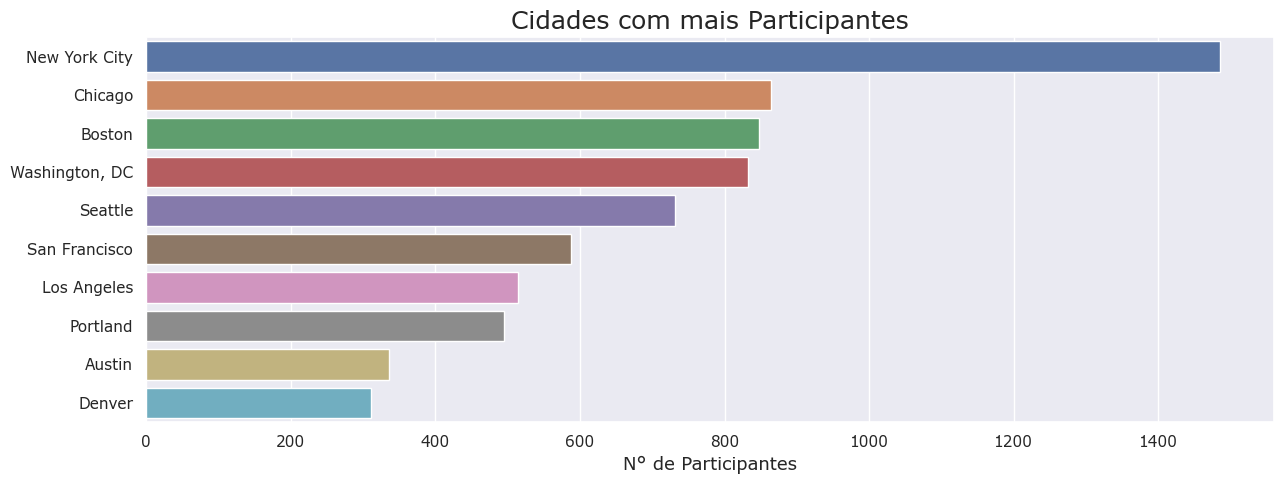

In [97]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style = 'darkgrid', font='verdana')
cities = df['city'].value_counts(dropna=False)[0:10]
ax = sns.barplot(y=cities.index, x=cities)
ax.set_title('Cidades com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
plt.tight_layout()

#### Denver

In [98]:
df['city'].loc[df['city'].str.contains('Denver', na=False)].value_counts()

Denver                                  311
Denver                                   14
Denver, CO                                3
Denver metro                              3
Denver Metro Area                         2
Fully remote job (Denver area)            1
Not Denver                                1
Denver Metro                              1
Denver - remote, company based in DC      1
Denver CO                                 1
Lakewood (live in Denver)                 1
Denver - remote                           1
Denver-metro                              1
Name: city, dtype: int64

In [99]:
df['city'].loc[df['city'] == 'Not Denver'] = 'Unknown City'
df['city'].loc[df['city'].str.contains('Denver', na=False)] = 'Denver'

### Análise da Coluna Work Industry

In [100]:
df['work_industry'].describe()

count                 22054
unique                  994
top       Computing or Tech
freq                   3536
Name: work_industry, dtype: object

In [101]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                       3536
Nonprofits                              2032
Education (Higher Education)            1989
Health care                             1561
Accounting, Banking & Finance           1399
Engineering or Manufacturing            1362
Government and Public Administration    1348
Law                                      918
Marketing, Advertising & PR              870
Education (Primary/Secondary)            685
Business or Consulting                   669
Media & Digital                          594
Insurance                                444
Recruitment or HR                        386
Retail                                   382
Property or Construction                 296
Art & Design                             287
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Name: work_industry, dtype: int64

In [102]:
df['work_industry'].loc[df['work_industry'].str.contains('Education', na=False)].value_counts()

Education (Higher Education)                                                                               1989
Education (Primary/Secondary)                                                                               685
Educational technology                                                                                        2
Early Childhood Education                                                                                     2
Data/Institutional Research in Higher Education                                                               1
Hybrid Nonprofit Higher Education (we are part of a university but our entire budget comes from grants)       1
Education- museum/public outreach                                                                             1
Beauty Manufacturing & Education                                                                              1
Educational products                                                                                    

In [103]:
df['work_industry'].loc[df['work_industry'].str.contains('Education', na=False)] = 'Education'
df['work_industry'].loc[df['work_industry'].str.contains('Education', na=False)].value_counts()

Education    2700
Name: work_industry, dtype: int64

In [104]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                       3536
Education                               2700
Nonprofits                              2032
Health care                             1561
Accounting, Banking & Finance           1399
Engineering or Manufacturing            1362
Government and Public Administration    1348
Law                                      918
Marketing, Advertising & PR              870
Business or Consulting                   669
Media & Digital                          594
Insurance                                444
Recruitment or HR                        386
Retail                                   382
Property or Construction                 296
Art & Design                             287
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Social Work                              227
Name: work_industry, dtype: int64

In [105]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)].value_counts()

Insurance                           444
Health Insurance                      1
Automotive finance and insurance      1
Name: work_industry, dtype: int64

In [106]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)] = 'Insurance'
df['work_industry'].loc[df['work_industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)].value_counts()

Insurance    446
Name: work_industry, dtype: int64

In [107]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)].value_counts()

Health care                                         1561
Biomedical Research                                    8
Medical Research                                       4
Public Health                                          4
Medical Devices                                        3
Healthcare IT                                          3
Biomedical research                                    2
Public health                                          2
Medical Device                                         2
Medical Technology                                     2
public health                                          2
Global Health Consulting                               1
Medical supply Wholesale & Warehousing                 1
Animal Health                                          1
Animal health industry                                 1
Non-profit health care (I couldn’t select both)        1
Public Health- state level                             1
Healthcare Information Technolo

In [108]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)] = 'Medical/Health Care'
df['work_industry'].loc[df['work_industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)].value_counts()

Medical/Health Care    1634
Name: work_industry, dtype: int64

In [109]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                       3536
Education                               2700
Nonprofits                              2032
Medical/Health Care                     1634
Accounting, Banking & Finance           1399
Engineering or Manufacturing            1362
Government and Public Administration    1348
Law                                      918
Marketing, Advertising & PR              870
Business or Consulting                   669
Media & Digital                          594
Insurance                                446
Recruitment or HR                        386
Retail                                   382
Property or Construction                 296
Art & Design                             287
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Social Work                              227
Name: work_industry, dtype: int64

In [110]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'(Engineering)|(Manufacturing)|(Construction)|(Architecture|archi)', 
                                 regex=True, na=False)].value_counts()

Engineering or Manufacturing                           1362
Property or Construction                                296
Manufacturing                                            22
Architecture                                             17
Manufacturing                                            11
Construction                                              7
Architecture                                              6
Construction                                              3
Food Manufacturing                                        2
Library/archives                                          2
Pharmaceutical Manufacturing                              2
Production and Manufacturing                              1
Aerospace and Defense Manufacturing                       1
Manufacturing/Consumer Packaged Goods                     1
R&D in Manufacturing                                      1
Landscape Architecture                                    1
Architecture, Engineering, Construction 

In [111]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Engineering)|(Manufacturing)|(Construction)|(Architecture|archi)', 
                                                         regex=True, na=False)] = 'Engineering/Manufacturing/Construction'

In [112]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Libra|libra)', regex=True, na=False)].value_counts()

Libraries                                                                                                 44
Library                                                                                                   44
Public Library                                                                                            31
Public Libraries                                                                                          16
Public library                                                                                             9
public library                                                                                             5
Public library                                                                                             4
Library                                                                                                    4
library                                                                                                    4
Librarian          

In [113]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Libra|libra)', 
                                                         regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [114]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Business|business)', regex=True, na=False)].value_counts()

Business or Consulting                      669
Business/Consulting/Administrative Work     213
Business Services                             1
Federal Contracting/Business Development      1
Small business/service company                1
Business Process Outsourcing                  1
I have two jobs. Marketing / Business         1
Name: work_industry, dtype: int64

In [115]:
df['work_industry'].loc[df['work_industry'] == 'Business or Consulting'] = 'Business/Consulting/Administrative Work'

In [116]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Marketing|marketing)', regex=True, na=False)].value_counts()

Marketing, Advertising & PR                                                              870
Marketing at a Non Profit                                                                  1
University tech transfer (higher ed/marketing/writing)                                     1
Marketing technology                                                                       1
digital marketing within a book publishing company (please reclassify as you see fit)      1
I have two jobs. Marketing / Business                                                      1
Digital Marketing                                                                          1
Name: work_industry, dtype: int64

In [117]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Marketing|marketing)', 
                                                         regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [118]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Recruitment|HR|Human Resources)', 
                                                         regex=True, na=False)].value_counts()

Recruitment or HR    386
Human Resources        2
HRO                    1
Human Resources        1
Name: work_industry, dtype: int64

In [119]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'(Recruitment|HR|Human Resources)', 
                                 regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [120]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                          3536
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting, Banking & Finance              1399
Government and Public Administration       1348
Law                                         918
Media & Digital                             594
Insurance                                   446
Retail                                      382
Art & Design                                287
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 227
Hospitality & Events                        200
Entertainment                               195
Agriculture or Forestry                     105
Name: work_industry, dtype: int64

In [121]:
df['work_industry'].loc[df['work_industry'].str.contains(r'((Art|art)|(Design|design)|(Media|media))', 
                                                         regex=True, na=False)].value_counts()

Media & Digital                            594
Art & Design                               287
apparel design/product development           1
consumer product design                      1
Instructional Design and Training            1
Instructional Design, Aviation Industry      1
Instructional Designer                       1
Nonprofit - legal department                 1
Interior Design (commercial)                 1
Funding Intermediary                         1
art appraisal                                1
Performing Arts                              1
Consumer Products design                     1
Arts Administration                          1
Earth sciences                               1
Name: work_industry, dtype: int64

In [122]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'((Art|art)|(Design|design)|(Media|media))', regex=True, na=False)] = 'Art/Design/Media'

In [123]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'(Hospitality|(events|Events)|(Entertainment|entertainment))', 
                                 regex=True, na=False)].value_counts()

Hospitality & Events                   200
Entertainment                          195
Fitness & Entertainment                  1
Entertainment data                       1
Graduate assistant and also events       1
Name: work_industry, dtype: int64

In [124]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'(Hospitality|(events|Events)|(Entertainment|entertainment))', 
                                 regex=True, na=False)] = 'Hospitality/Events/Entertainment'

In [125]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                          3536
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting, Banking & Finance              1399
Government and Public Administration       1348
Law                                         918
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 227
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Publishing                                   45
Name: work_industry, dtype: int64

In [126]:
df['work_industry'].loc[df['work_industry'].str.contains(r'((Account|account)|(finance|Finance)|banking)', 
                                                         regex=True, na=False)].value_counts()

Accounting, Banking & Finance                                            1399
Finance                                                                     3
Finance/Investment Management but in legal/compliance, so back-office       1
Corporate accounting in death care (funeral & cemetery)                     1
I work in the finance function of a large global conglomerate               1
finance                                                                     1
Professional Association in Finance                                         1
Name: work_industry, dtype: int64

In [127]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'((Account|account)|(finance|Finance)|banking)', 
                                 regex=True, na=False)] = 'Accounting/Banking/Finance'

In [128]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Govern|govern)|(politics|Politics)', 
                                                         regex=True, na=False)].value_counts()

Government and Public Administration                               1348
Politics                                                              8
Government Relations                                                  3
Government contracting                                                2
Government contractor                                                 2
Government Contracting                                                2
Government Affairs/Lobbying                                           2
Government Contracting R&D                                            1
Government                                                            1
Aerospace and Defense/Government Contracting                          1
Government Contractor (R&D)                                           1
government contractor, international development                      1
Science/government                                                    1
Science Research, government                                    

In [129]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Govern|govern)|(politics|Politics)', 
                                                         regex=True, na=False)] = 'Government/Public Administration'

In [130]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                          3536
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting/Banking/Finance                 1407
Government/Public Administration           1385
Law                                         918
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 227
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Biotech                                      45
Name: work_industry, dtype: int64

In [131]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Bio|bio|(pharma|Pharma))', regex=True, na=False)].value_counts()

Biotech                                                                                                                                                                        45
Pharmaceuticals                                                                                                                                                                19
Pharma                                                                                                                                                                         16
Biotechnology                                                                                                                                                                  15
Pharmaceutical                                                                                                                                                                 14
Pharmaceutical                                                                                                

In [132]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Bio|bio|(pharma|Pharma))', 
                                                         regex=True, na=False)] = 'Biotechnology/Pharma/Biology'

In [133]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                          3536
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting/Banking/Finance                 1407
Government/Public Administration           1385
Law                                         918
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 227
Biotechnology/Pharma/Biology                212
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Name: work_industry, dtype: int64

In [134]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport or Logistics                           235
Leisure, Sport & Tourism                          72
Industrial Cleaning & Non Hazardous Transport      1
Tourism                                            1
State-level public transportation agency           1
Sports                                             1
Name: work_industry, dtype: int64

In [135]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Transport|transport)|(logistics|Logistics|Supply|supply)', 
                                                         regex=True, na=False)].value_counts()

Transport or Logistics                           235
Supply chain                                       2
Supply Chain                                       2
Logistics                                          1
Supply Chain Distribution                          1
Industrial Cleaning & Non Hazardous Transport      1
State-level public transportation agency           1
Industrial Supply                                  1
Supply Chain!                                      1
Supply Chain Operations                            1
Name: work_industry, dtype: int64

In [136]:
df['work_industry'].loc[df['work_industry'].str.
                        contains(r'(Transport|transport)|(logistics|Logistics|Supply|supply)', 
                                 regex=True, na=False)] = 'Transport/Logistics'

In [137]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport/Logistics         246
Leisure, Sport & Tourism     72
Tourism                       1
Sports                        1
Name: work_industry, dtype: int64

In [138]:
df['work_industry'].replace({'Tourism':'Leisure, Sport & Tourism', 'Sports':'Leisure, Sport & Tourism'}, inplace=True)

In [139]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport/Logistics         246
Leisure, Sport & Tourism     74
Name: work_industry, dtype: int64

In [140]:
df['work_industry'].replace('Leisure, Sport & Tourism', 'Leisure/Sport/Tourism', inplace=True)

In [141]:
df['work_industry'].value_counts()[0:20]

Computing or Tech                          3536
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting/Banking/Finance                 1407
Government/Public Administration           1385
Law                                         918
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Utilities & Telecommunications              255
Transport/Logistics                         246
Sales                                       237
Social Work                                 227
Biotechnology/Pharma/Biology                212
Agriculture or Forestry                     105
Leisure/Sport/Tourism                        74
Name: work_industry, dtype: int64

In [142]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(agri|Agri)|(fore|Fore)', regex=True, na=False)].value_counts()

Agriculture or Forestry              105
Agriculture/Agriculture Chemical       1
Forensics                              1
Name: work_industry, dtype: int64

In [143]:
df['work_industry'].replace(
    {'Agriculture or Forestry':'Agriculture/Forestry', 
             'Agriculture/Agriculture Chemical':'Agriculture/Forestry', 'Forensics':'Law'}, inplace=True)

In [144]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(social|Social)', regex=True, na=False)].value_counts()

Social Work                                                                                227
Academic research (social science)                                                           1
social science research - not quite academia, not quite nonprofit, not quite consulting      1
Research/Social Science                                                                      1
Social science                                                                               1
Social sciences research                                                                     1
Name: work_industry, dtype: int64

In [145]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(social|Social)', regex=True, na=False)] = 'Social Work'

In [146]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(computing|Computing)|(tech|Tech)|(IT|Information)', 
                                                         regex=True, na=False)].value_counts()

Computing or Tech                            3536
Biotechnology/Pharma/Biology                  212
IT                                              4
Tech                                            3
Technology                                      3
Fintech                                         3
Publishing: Science, Academic, Technical        1
Ecommerce - Technology                          1
Automotive technician                           1
Technology                                      1
Ed Tech                                         1
Technical writing                               1
Educ tech                                       1
Information Technology                          1
Information technology (IT)                     1
Bitech                                          1
Information                                     1
FinTech/Payment Processing                      1
publishing/edtech                               1
IT MSP                                          1


In [147]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Comme|comme)', regex=True, na=False)].value_counts()

Commercial Real Estate                                4
E-commerce                                            3
Commercial Real Estate                                2
E commerce                                            1
e-commerce                                            1
Ecommerce                                             1
E-Commerce                                            1
Ecommerce fraud                                       1
Delivery and installation for commercial machinery    1
Commercial Real Estate Data and Analytics/Research    1
Fashion/e-commerce                                    1
Commercial Fisherman                                  1
Commercial furniture                                  1
Ecommerce - Technology                                1
Commercial Landscaping                                1
ECommerce                                             1
Commercial Building Material Distribution             1
Commercial Real Estate - Private Equity         

In [148]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Comme|comme)', regex=True, na=False)] = 'Sales'

In [149]:
df['work_industry'].loc[(df['work_industry'].str.contains(
    r'(computing|Computing)|(tech|Tech)|(IT|Information)', regex=True, na=False)) & 
                        (df['work_industry'] != 'Biotechnology/Pharma/Biology') & 
                        (df['work_industry'] != 'Automotive technician')].value_counts()

Computing or Tech                            3536
IT                                              4
Fintech                                         3
Technology                                      3
Tech                                            3
publishing/edtech                               1
Bitech                                          1
Information technology (IT)                     1
Information Technology                          1
Educ tech                                       1
Technical writing                               1
Technology                                      1
Publishing: Science, Academic, Technical        1
Information                                     1
Ed Tech                                         1
FinTech/Payment Processing                      1
IT MSP                                          1
IT Security                                     1
Govtech Software as a Service                   1
Information Technology                          1


In [150]:
df['work_industry'].loc[(df['work_industry'].str.contains(
    r'(computing|Computing)|(tech|Tech)|(IT|Information)', regex=True, na=False)) & 
                        (df['work_industry'] != 'Biotechnology/Pharma/Biology')] = 'Computing/IT/Tech'

In [151]:
df['work_industry'].value_counts()[0:20]

Computing/IT/Tech                          3571
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting/Banking/Finance                 1407
Government/Public Administration           1385
Law                                         919
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Sales                                       262
Utilities & Telecommunications              255
Transport/Logistics                         246
Social Work                                 232
Biotechnology/Pharma/Biology                212
Agriculture/Forestry                        105
Leisure/Sport/Tourism                        74
Name: work_industry, dtype: int64

In [152]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Tele|tele|commu)|(util|Util)', regex=True, na=False)].value_counts()

Utilities & Telecommunications    255
Telecommunications (GPS)            1
Telecommunications                  1
Name: work_industry, dtype: int64

In [153]:
df['work_industry'].loc[df['work_industry'].str.contains(r'(Tele|tele|commu)|(util|Util)', 
                                                         regex=True, na=False)] = 'Utilities/Telecommunications'

In [154]:
print(round(((df['work_industry'].value_counts()[0:20].sum()/df['work_industry'].count())*100), 2),'% dos dados dessa variável foram tratados.')
print('O número de categorias ainda existentes para essa variável é:', df['work_industry'].nunique())

#Conforme é visto, a cardinalidade diminuiu, contudo permanece elevada. O ponto positivo é que a imensa maioria dos dados
#foram tratados. Ponderando a situação, decidi substituir as entradas de dados correspondentes às categorias que não 
#foram tratadas por "Others/Not Correctly Specified". É uma parcela pequena para o seu tamanho de cardinalidade.

95.51 % dos dados dessa variável foram tratados.
O número de categorias ainda existentes para essa variável é: 628


In [155]:
df['work_industry'].value_counts()[0:20].index

Index(['Computing/IT/Tech', 'Education',
       'Business/Consulting/Administrative Work', 'Nonprofits',
       'Engineering/Manufacturing/Construction', 'Medical/Health Care',
       'Accounting/Banking/Finance', 'Government/Public Administration', 'Law',
       'Art/Design/Media', 'Insurance', 'Hospitality/Events/Entertainment',
       'Retail', 'Sales', 'Utilities/Telecommunications',
       'Transport/Logistics', 'Social Work', 'Biotechnology/Pharma/Biology',
       'Agriculture/Forestry', 'Leisure/Sport/Tourism'],
      dtype='object')

In [156]:
for i in df['work_industry'].value_counts()[20:].index:
    df['work_industry'].loc[df['work_industry'] == i] = 'Others/Not Correctly Specified'

df['work_industry'].value_counts()

Computing/IT/Tech                          3571
Education                                  2700
Business/Consulting/Administrative Work    2148
Nonprofits                                 2032
Engineering/Manufacturing/Construction     1759
Medical/Health Care                        1634
Accounting/Banking/Finance                 1407
Government/Public Administration           1385
Others/Not Correctly Specified              991
Law                                         919
Art/Design/Media                            894
Insurance                                   446
Hospitality/Events/Entertainment            398
Retail                                      382
Sales                                       262
Utilities/Telecommunications                257
Transport/Logistics                         246
Social Work                                 232
Biotechnology/Pharma/Biology                212
Agriculture/Forestry                        105
Leisure/Sport/Tourism                   

#### Gráficos de Salários Anuais pós tratamento inicias:
> Continua com outliers severos. 

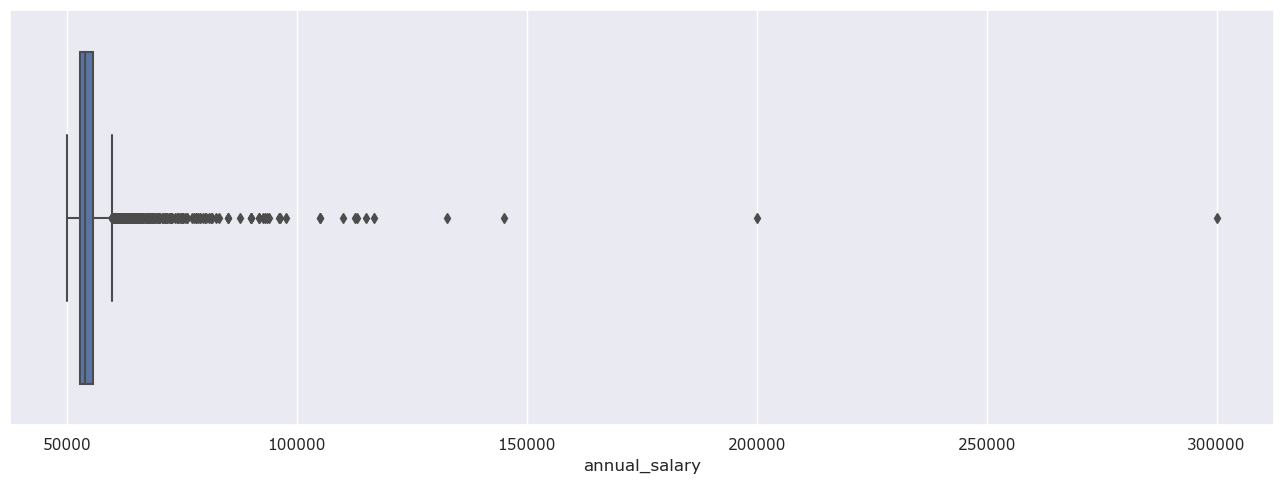

In [157]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(x=df['annual_salary'])
ax.set_xticklabels(np.arange(0,750000,50000))
plt.tight_layout()

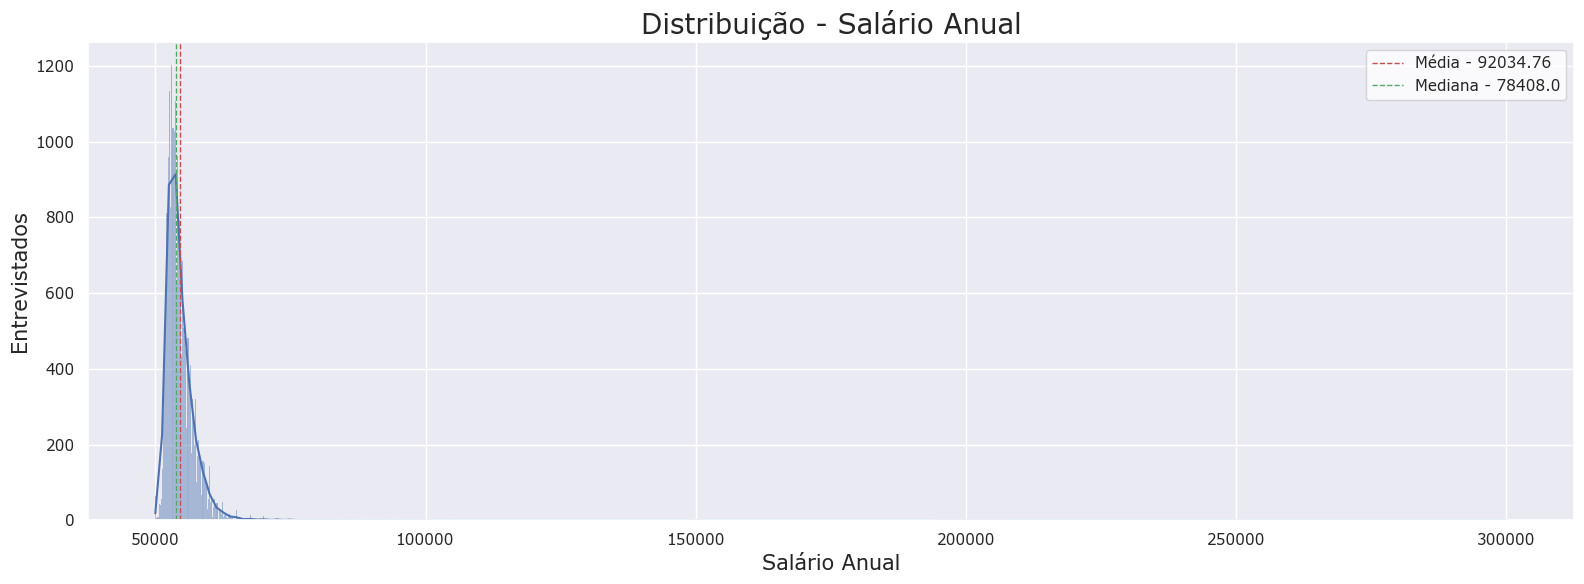

In [158]:
fig, ax = plt.subplots(figsize=(16,6))
sns.set_theme(style='white', font='verdana')
ax = sns.histplot(x=df['annual_salary'], kde=True)
mean =  'Média - ' + str(round(df['annual_salary'].mean(), 2))
median =  'Mediana - ' + str(round(df['annual_salary'].median(), 2))
ax.axvline(df['annual_salary'].mean(), color='r', ls='--', lw=1, label=mean)
ax.axvline(df['annual_salary'].median(), color='g', ls='--', lw=1, label=median)
ax.set_title('Distribuição - Salário Anual', fontsize=20)
ax.set_xlabel('Salário Anual', fontsize=15)
ax.set_ylabel('Entrevistados', fontsize=15)
ax.set_xticklabels(np.arange(0,500000,50000))
plt.legend(loc='upper right')

plt.tight_layout()

## 

In [159]:
df.head()

,age,work_industry,job_title,annual_salary,currency,country,state_(US),city,overall_work_exp.,fieldwork _exp.,level_of_education,gender,race,City
0,25-34,Education,Research and Instruction Librarian,55000.0,USD,USA,Massachusetts,Boston,5 - 7 years,5 - 7 years,Master's degree,Woman,White,NaN
1,25-34,Accounting/Banking/Finance,Marketing Specialist,34000.0,USD,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,NaN
2,25-34,Nonprofits,Program Manager,62000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5 - 7 years,College degree,Woman,White,NaN
3,25-34,Accounting/Banking/Finance,Accounting Manager,60000.0,USD,USA,South Carolina,Greenville,8 - 10 years,5 - 7 years,College degree,Woman,White,NaN
4,25-34,Education,Scholarly Publishing Librarian,62000.0,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,NaN


In [162]:
df.drop('City', axis= 1, inplace= True)

In [164]:
#Salvar para fazer os tratamentos finais e o modelo de ML.
df.to_csv('Projeto_1_ML.csv', index=False)